**This notebook is an effort to answer StackOverflow Questions and Issue**

# Imports

In [1]:
# Check version runing on Jupyter notebook
from platform import python_version
import sys

print('Python Version : ', python_version())
print('Python Path : ', sys.executable)

Python Version :  3.6.13
Python Path :  D:\Personal Stuff\swtloc-project\venvs\py36VenvDev\python.exe


In [2]:
import sys
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from swtloc import SWTLocalizer
from swtloc._utils import auto_canny, imgshowN, imgshow

In [4]:
from cv2 import cv2
import numpy as np
cv2.__version__

'4.5.5'

# Raw Datapaths and Variable Initialisation

In [8]:
rawimage_path = 'images/'

# Q1
https://stackoverflow.com/questions/40443988/python-opencv-ocr-image-segmentation

In [ ]:
imgpath = rawimage_path+'so1_img1.jpg'

swtl = SWTLocalizer()
swtl.swttransform(imgpaths=imgpath, text_mode = 'lb_df', gs_blurr=False ,
                  minrsw = 3, maxrsw = 10, max_angledev = np.pi/3)

In [ ]:
# Plotting three variants of the images during the process of the
# transformation -> Original > Stroke Width Transform > Connected Components
imgshowN([swtl.orig_img, swtl.swt_mat, swtl.swt_labelled3C],
         ['Original Image', 'Stroke Width Transform', 'Connected Components'])

In [ ]:
respacket = swtl.get_grouped(lookup_radii_multiplier=.8, sw_ratio=2,
                     cl_deviat=[13,13,13], ht_ratio=2, 
                     ar_ratio=4, ang_deviat=30)

grouped_labels = respacket[0]
grouped_bubblebbox = respacket[1]
grouped_annot_bubble = respacket[2]
grouped_annot = respacket[3]
maskviz = respacket[4]
maskcomb  = respacket[5]


In [ ]:
imgshowN([swtl.orig_img, grouped_annot_bubble],
         ['Original', 'Grouped Bubble BBox Annotation'])

# Q2

https://stackoverflow.com/questions/4837124/stroke-width-transform-swt-implementation-java-c

In [9]:
from swtloc import SWTLocalizer

imgpath = rawimage_path+'so2/so2_img1.jpg'
swtl = SWTLocalizer()
swtl.swttransform(imgpaths=imgpath, save_results=True, save_rootpath='swtres/',
                  edge_func = 'ac', ac_sigma = 1.0, text_mode = 'lb_df',
                  gs_blurr=True, blurr_kernel = (5,5), minrsw = 3, 
                  maxCC_comppx = 10000, maxrsw = 20, max_angledev = np.pi/6, 
                  acceptCC_aspectratio = 5.0)

DEPRECATED : `swttransform` function deprecated in favour of 'transform'. Reason - Refactoring Changes; To be Removed in - v2.1.0
MainProcess @  |                COMPLETE                 | -> STATUS: 0.0% 1/1 Images Done. Transformations Complete



In [10]:
swtl.transform_time

'8.802 sec'

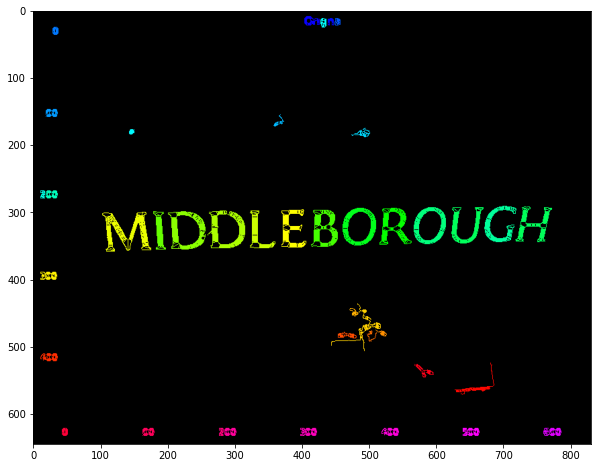

In [11]:
imgshow(swtl.swtlabelled_pruned13C)

In [ ]:
repacket=swtl.get_grouped()
grouped_annot_bubble = repacket[2]
imgshow(grouped_annot_bubble)

# Q3
https://stackoverflow.com/questions/31667709/can-swt-stroke-width-transform-help-ocr-with-screenshots

Shape changed from (717, 1081, 3) -> (1434, 2162, 3)
DEPRECATED : `swttransform` function deprecated in favour of 'transform'. Reason - Refactoring Changes; To be Removed in - v2.1.0
MainProcess @  |                COMPLETE                 | -> STATUS: 0.0% 1/1 Images Done. Transformations Complete



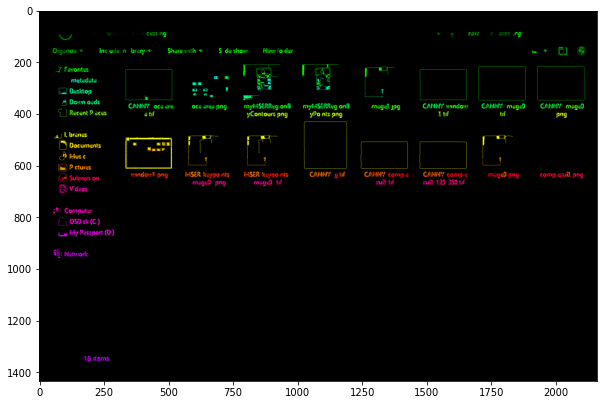

In [13]:
from swtloc import SWTLocalizer
from swtloc._utils import resize_maintinaAR

imgpath = rawimage_path+'so3/so3_img1.png'
r_imgpath = rawimage_path+'so3/so3_img11.jpg'

swtl = SWTLocalizer()

orig_img = cv2.imread(imgpath)
resized_img = resize_maintinaAR(orig_img, width=2.0)
print(f'Shape changed from {orig_img.shape} -> {resized_img.shape}')
cv2.imwrite(r_imgpath, resized_img)

swtl.swttransform(imgpaths=r_imgpath, text_mode = 'lb_df',
                  minrsw = 3, maxrsw = 10, max_angledev = np.pi/6)
imgshow(swtl.swtlabelled_pruned13C)

In [14]:
swtl.transform_time

'36.897 sec'

In [ ]:
min_bboxes, min_bbox_annotated = swtl.get_min_bbox(show=True, padding=10)

In [ ]:
_=cv2.imwrite(rawimage_path+'so3_img11_processed.jpg', swtl.swtlabelled_pruned13C)
_=cv2.imwrite(rawimage_path+'so3_img11_annot.jpg', min_bbox_annotated)

# Q4
https://stackoverflow.com/questions/23506105/extracting-text-opencv

In [ ]:
import os
imgpaths = [rawimage_path+k for k in os.listdir(rawimage_path) if 'so4' in k if 'processed' not in k]
imgpaths

In [ ]:
from swtloc import SWTLocalizer
from swtloc._utils import imgshowN, imgshow

swtl = SWTLocalizer()
# Stroke Width Transform
swtl.swttransform(imgpaths=imgpaths[2], text_mode = 'lb_df',
                  save_results=True, save_rootpath = 'swtres/',
                  minrsw = 3, maxrsw = 20, max_angledev = np.pi/3)
imgshow(swtl.swtlabelled_pruned13C)

# Grouping
respacket=swtl.get_grouped(lookup_radii_multiplier=0.9, ht_ratio=3.0)
grouped_annot_bubble = respacket[2]
maskviz = respacket[4]
maskcomb  = respacket[5]

# Saving the results
_=cv2.imwrite(rawimage_path+'so4_img1_processed.jpg', swtl.swtlabelled_pruned13C)
imgshowN([maskcomb, grouped_annot_bubble], 
         ['Overlapping Masks', 'Annotated Bubble Bounding Boxes'],
         savepath=rawimage_path+'combined_mask1.jpg')

# Q5
https://stackoverflow.com/questions/46533389/find-the-width-of-an-ink-stroke-in-an-image-using-opencv-c/46533420

In [ ]:
from swtloc import SWTLocalizer
from swtloc._utils import imgshow

# Stroke Width Transform
imgpath = rawimage_path+'so5_img1.jpg'
swtl = SWTLocalizer()
swtl.swttransform(imgpaths=imgpath, text_mode = 'lb_df',
                  save_results=True, save_rootpath = 'swtres/',
                  ac_sigma = 1.0, gs_blurr =False,
                  minrsw = 3, maxrsw = 50, max_angledev = np.pi/3)
imgshow(swtl.swt_labelled3C)

In [ ]:
import matplotlib.pyplot as plt
all_sws = []
for k,v in swtl.components_props.items():
    all_sws.append(v['sw_median'])
import seaborn as sns
sns.displot(all_sws, bins=31)
plt.savefig(rawimage_path+'sw_distribution.jpg')

In [ ]:
_=cv2.imwrite(rawimage_path+'so5_img1_processed.jpg', swtl.swtlabelled_pruned13C)

In [ ]:
respacket=swtl.get_grouped(lookup_radii_multiplier=0.9, ht_ratio=3.0, bubble_width=3)
grouped_annot_bubble = respacket[2]
imgshow(grouped_annot_bubble)

# Q6
Bubble BBOX issue : Issue #10

In [ ]:
# Ensure that OpenCV version is same as mentioned below.
# !pip install opencv-python==4.5.1.48

In [ ]:
from swtloc import SWTLocalizer
from swtloc._utils import imgshow

imgpath = rawimage_path+'bbox_err_image.jpg'
swtl = SWTLocalizer()

# Stroke Width Transform
swtl.swttransform(imgpaths=imgpath, text_mode = 'db_lf',
                  save_results=True, save_rootpath = 'swtres/',
                  ac_sigma = 1.0, gs_blurr=True, blurr_kernel = (5,5), maxCC_comppx = 5000, 
                  minrsw = 3, maxrsw = 200, max_angledev = np.pi/6, acceptCC_aspectratio = 5.0)

imgshow(swtl.swt_labelled3C)

In [ ]:
respacket = swtl.get_grouped(lookup_radii_multiplier=.8, sw_ratio=2,
                     cl_deviat=[13,13,13], ht_ratio=2, 
                     ar_ratio=4, ang_deviat=30)

grouped_labels = respacket[0]
grouped_bubblebbox = respacket[1]
grouped_annot_bubble = respacket[2]
grouped_annot = respacket[3]
maskviz = respacket[4]
maskcomb  = respacket[5]

imgshowN([grouped_annot_bubble],
         ['Grouped Bubble BBox Annotation'])